# Visualizing the Network Method of Interest

Consider two functions $x = \sin(\omega t)$ and $y = \sin(\omega t)$. We sample n data points from there time series.

## Initializing Packages and Networks

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation, FFMpegWriter
from visualization_utilities import get_Ax, plot_Ax, get_Axy, plot_Axy, plot_Axy_frame, get_Cv_XY, get_C_XY

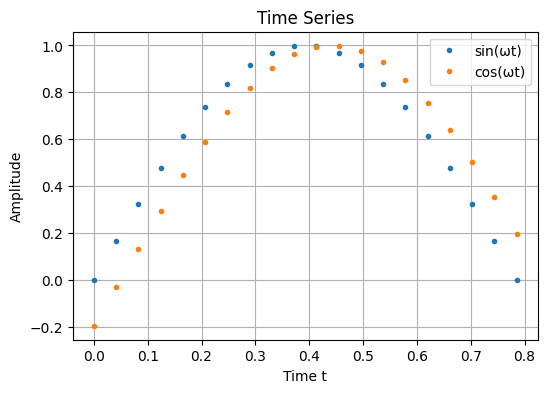

In [6]:
# number of samples from each time series
n = 20
n_window = 4
# time points
t = np.linspace(0, np.pi/4, n)
# angular velocity
omega = 4
# time series
x = np.sin(omega * t)
y = np.sin(omega * t-np.pi/16)

# plotting
plt.figure(figsize=(6,4))
plt.plot(t, x, '.', label='sin(ωt)')
plt.plot(t, y, '.', label='cos(ωt)')
plt.xlabel('Time t')
plt.ylabel('Amplitude')
plt.title('Time Series')
plt.legend()
plt.grid(True)
plt.show()


RRx = 0.36
RRy = 0.335
RRxy = 0.19


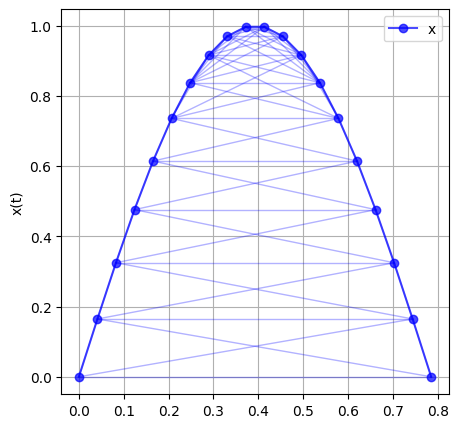

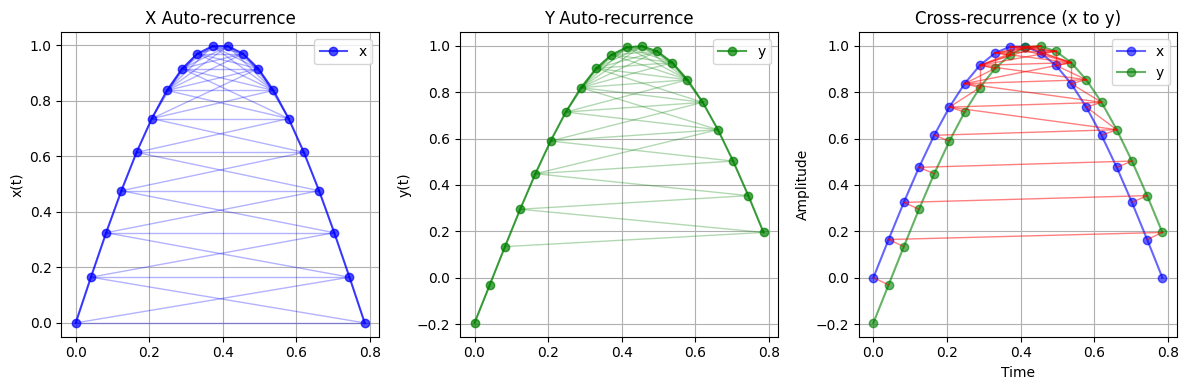

In [7]:
epsilon_x = 0.2
epsilon_y = 0.2
epsilon_xy = 0.1

Ax, RRx = get_Ax(x,epsilon_x)

fig, ax = plt.subplots(figsize=(5, 5))
plot_Ax(t, x, Ax, 'blue','x', ax=ax)

Axy, RRxy = get_Axy(x,y,epsilon_x, epsilon_y, epsilon_xy)
plot_Axy(t,x,y,Axy)


In [8]:
# Define the intervals (starts)
starts = np.arange(0, n, n_window) # Step of 2 for smoother animation
starts = np.append(starts, n)

In [9]:
starts

array([ 0,  4,  8, 12, 16, 20])

RRx = 0.625
RRy = 0.625
RRxy = 0.1875


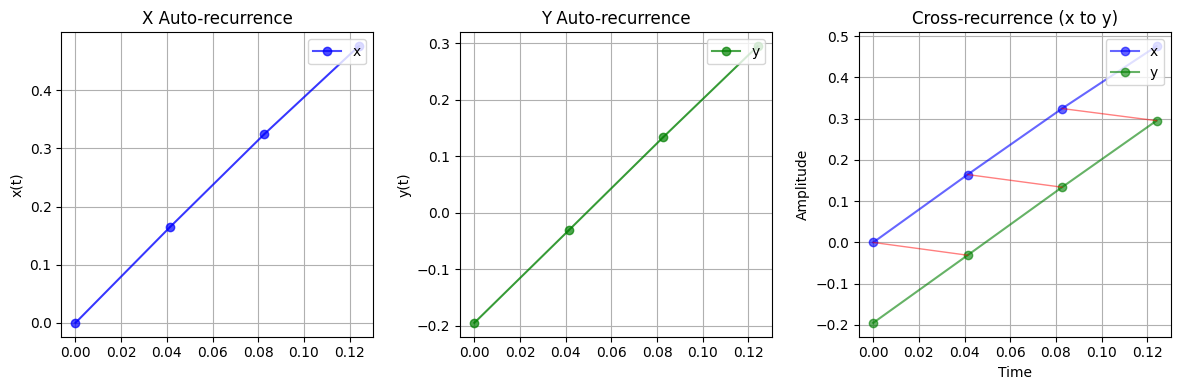

RRx = 0.75
RRy = 0.625
RRxy = 0.3125


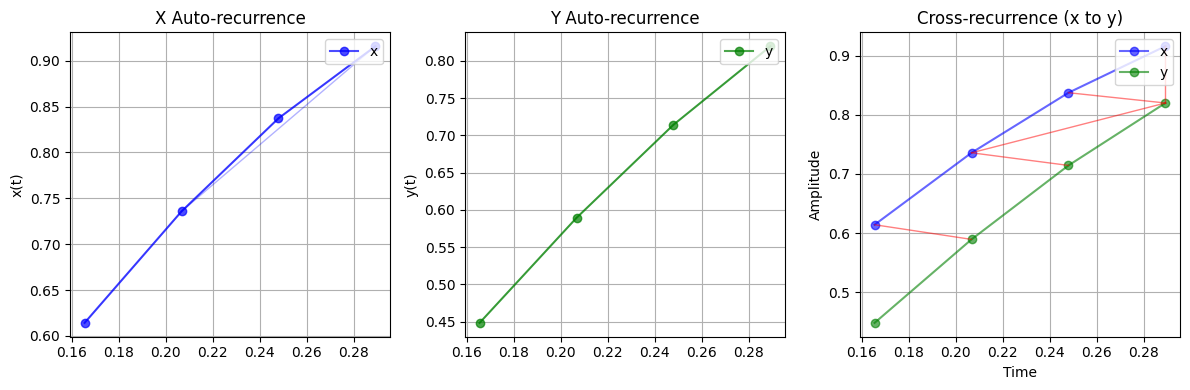

RRx = 1.0
RRy = 1.0
RRxy = 1.0


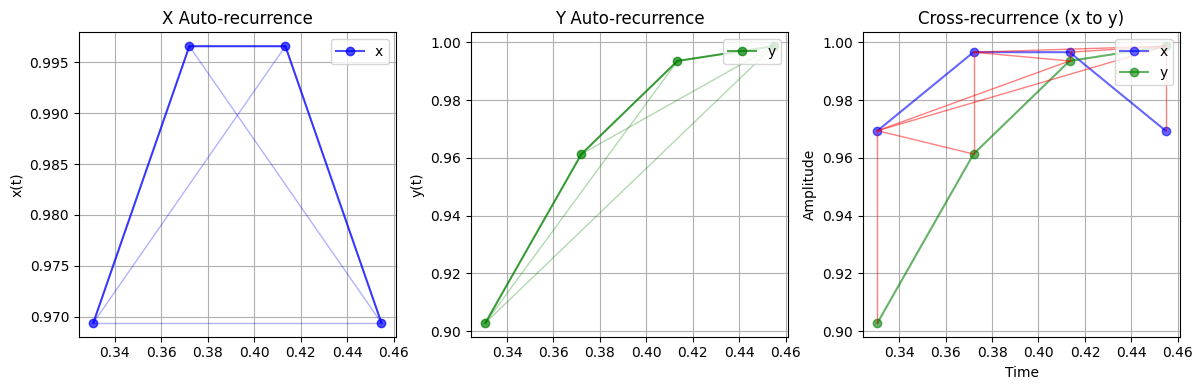

RRx = 0.75
RRy = 0.875
RRxy = 0.4375


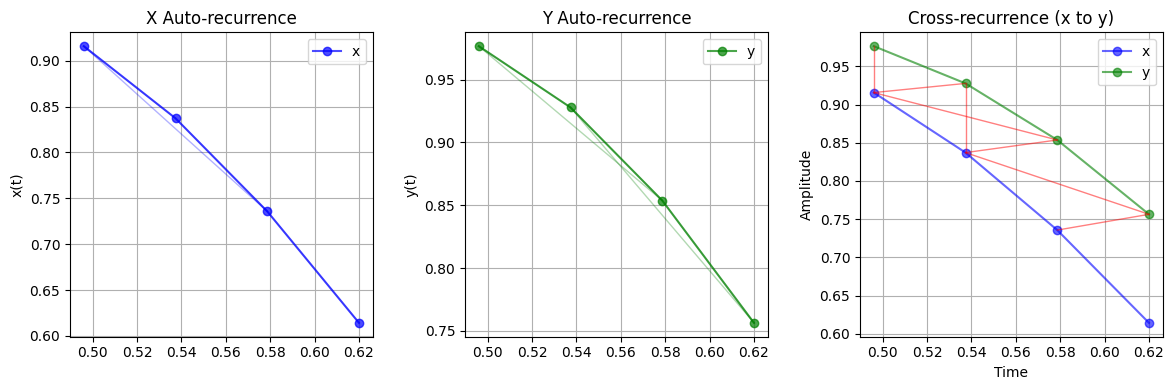

In [10]:
# Define the intervals (starts)
starts = np.arange(0, n, n_window) # Step of 2 for smoother animation


for i in range(np.size(starts)-1):
    t_int = t[starts[i]:starts[i+1]]
    x_int = x[starts[i]:starts[i+1]]
    y_int = y[starts[i]:starts[i+1]]
    Axy_int, RRxy_int = get_Axy(x_int,y_int,epsilon_x, epsilon_y, epsilon_xy)
    plot_Axy(t_int,x_int,y_int,Axy_int)

RRx = 0.625
RRy = 0.625
RRxy = 0.1875
RRx = 0.625
RRy = 0.625
RRxy = 0.1875
RRx = 0.625
RRy = 0.625
RRxy = 0.1875
RRx = 0.625
RRy = 0.625
RRxy = 0.1875
RRx = 0.625
RRy = 0.625
RRxy = 0.1875
RRx = 0.75
RRy = 0.625
RRxy = 0.3125
RRx = 0.875
RRy = 0.75
RRxy = 0.4375
RRx = 1.0
RRy = 0.875
RRxy = 0.5625
RRx = 1.0
RRy = 1.0
RRxy = 0.8125
RRx = 1.0
RRy = 1.0
RRxy = 1.0
RRx = 1.0
RRy = 1.0
RRxy = 1.0
RRx = 1.0
RRy = 1.0
RRxy = 0.8125
RRx = 0.875
RRy = 1.0
RRxy = 0.5625
RRx = 0.75
RRy = 0.875
RRxy = 0.4375
RRx = 0.625
RRy = 0.75
RRxy = 0.375
RRx = 0.625
RRy = 0.625
RRxy = 0.25
RRx = 0.625
RRy = 0.625
RRxy = 0.1875


ValueError: unknown file extension: .mp4

RRx = 0.625
RRy = 0.625
RRxy = 0.1875


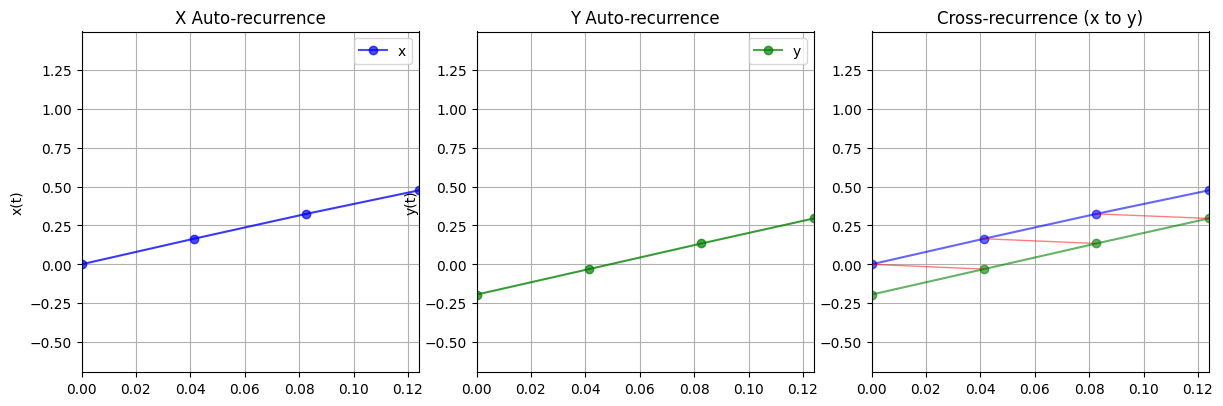

In [17]:
# 1. Create the Figure and Axes ONCE
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
axes_list = [ax1, ax2, ax3]

# 2. Define the Loop Range
starts = np.arange(0, n - n_window, 1)

# 3. Define the Update Function
def update(frame_idx):
    # A. Clear previous drawings
    for ax in axes_list:
        ax.clear()
        
    # B. Slice Data
    start = starts[frame_idx]
    end = start + n_window
    
    t_int = t[start:end]
    x_int = x[start:end]
    y_int = y[start:end]
    
    # C. Get Matrix (Replace with your real get_Axy)
    Axy_int, RRxy = get_Axy(x_int, y_int, epsilon_x, epsilon_y, epsilon_xy)
    
    # D. Plot
    plot_Axy_frame(t_int, x_int, y_int, Axy_int, axes=axes_list)
    
    # E. Fix Axes Limits (Crucial for smooth animation)
    # We set limits based on the GLOBAL min/max so the plot doesn't jump
    for ax in axes_list:
        ax.set_ylim(min(np.min(x), np.min(y)) - 0.5, 
                    max(np.max(x), np.max(y)) + 0.5)
        ax.set_xlim(t_int[0], t_int[-1]) # Or keep fixed: (0, 10)

# 4. Run Animation
ani = FuncAnimation(fig, update, frames=len(starts), interval=100, repeat=True)
plt.tight_layout()
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('animation.mp4', writer=writer)

plt.show()

Saving animation to 'time_series_window.mp4'...
Done!


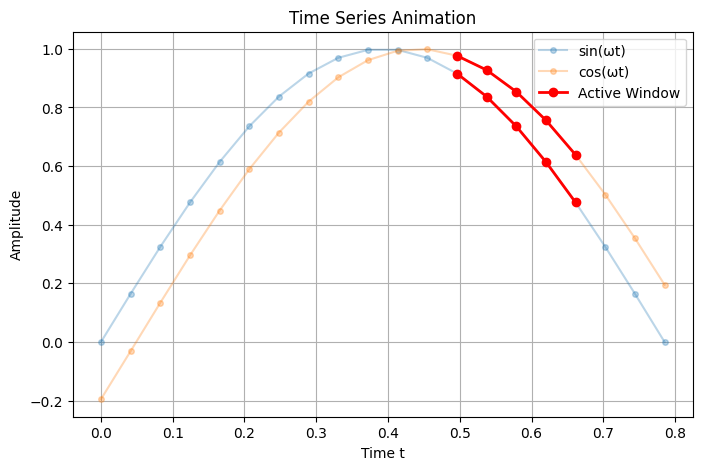

In [15]:


# Define the intervals (starts)
starts = np.arange(0, n - n_window, n_window) # Step of 2 for smoother animation

# --- 2. Setup the Plot ---
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the static background (The full time series)
# We assign them to variables just in case we need to modify them, 
# but here they remain static.
ax.plot(t, x, '-o', label='sin(ωt)', alpha=0.3, markersize=4) 
ax.plot(t, y, '-o', label='cos(ωt)', alpha=0.3, markersize=4)

# Initialize the dynamic elements (The moving "Red" windows)
# We create empty line objects that we will update in the loop
line_x, = ax.plot([], [], '-o', color='red', linewidth=2, label='Active Window')
line_y, = ax.plot([], [], '-o', color='red', linewidth=2)

# Styling
ax.set_xlabel('Time t')
ax.set_ylabel('Amplitude')
ax.set_title('Time Series Animation')
ax.legend(loc='upper right')
ax.grid(True)

# --- 3. Animation Logic ---

def init():
    """Initializes the background of the animation."""
    line_x.set_data([], [])
    line_y.set_data([], [])
    return line_x, line_y

def update(frame):
    """
    Update function called for every frame.
    'frame' is the index passed from the frames argument in FuncAnimation.
    """
    start_idx = starts[frame]
    end_idx = start_idx + n_window + 1 # +1 to ensure line connectivity
    
    # Update the data for the red lines based on the current window
    current_t = t[start_idx:end_idx]
    current_x = x[start_idx:end_idx]
    current_y = y[start_idx:end_idx]
    
    line_x.set_data(current_t, current_x)
    line_y.set_data(current_t, current_y)
    
    return line_x, line_y

# Create the animation object
# frames=len(starts) tells it how many times to run the loop
# interval=50 means 50 milliseconds between frames
anim = FuncAnimation(fig, update, init_func=init, 
                     frames=len(starts), interval=50, blit=True)

# --- 4. Save to MP4 ---
print("Saving animation to 'time_series_window.mp4'...")

# You can adjust fps (frames per second) to change speed
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
anim.save('time_series_window.mp4', writer=writer)

print("Done!")
plt.show() # Optional: show the window

# Inter-system recurrence network: Two timeseries

## Multiple time series

In [13]:
Nx = np.size(x)
Ny = np.size(y)
print(get_C_XY(Nx,Ny,Axy))

0.9314285714285715


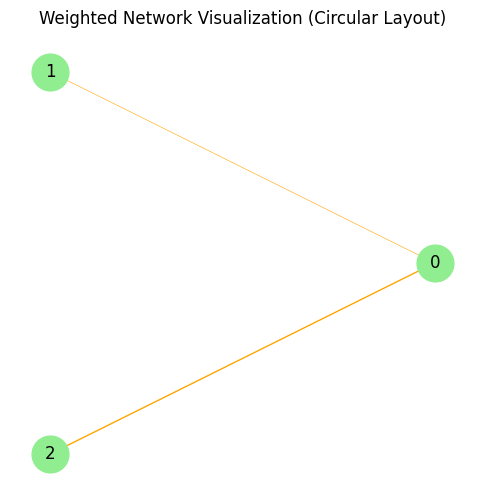

In [14]:
C = np.array([[0,0.4,1],[0.4,0,0],[1,0,0]])

# Create graph
G = nx.from_numpy_array(C)

# Circular layout
pos = nx.circular_layout(G)

plt.figure(figsize=(6,6))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=700)

# Draw edges with thickness proportional to weights
weights = [C[i, j] for i, j in G.edges()]
nx.draw_networkx_edges(G, pos, width=weights, edge_color='orange')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

plt.title("Weighted Network Visualization (Circular Layout)")
plt.axis('off')
plt.show()


## Discrete Intervals

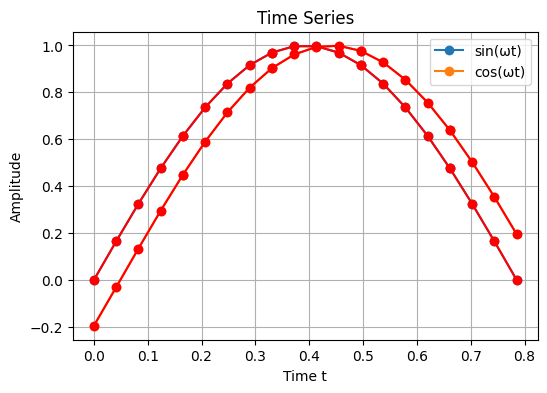

In [15]:
starts = np.arange(0, n, n_window)

# plotting
plt.figure(figsize=(6,4))
plt.plot(t, x, '-o', label='sin(ωt)')
plt.plot(t, y, '-o', label='cos(ωt)')
plt.xlabel('Time t')
plt.ylabel('Amplitude')
plt.title('Time Series')
plt.legend()
plt.grid(True)

for i in range(np.size(starts)):
    plt.plot(t[starts[i]:starts[i]+n_window+1], x[starts[i]:starts[i]+n_window+1], '-o', color='Red')
    plt.plot(t[starts[i]:starts[i]+n_window+1], y[starts[i]:starts[i]+n_window+1], '-o', color='Red')

plt.show()

Saving animation to 'time_series_window.mp4'...
Done!


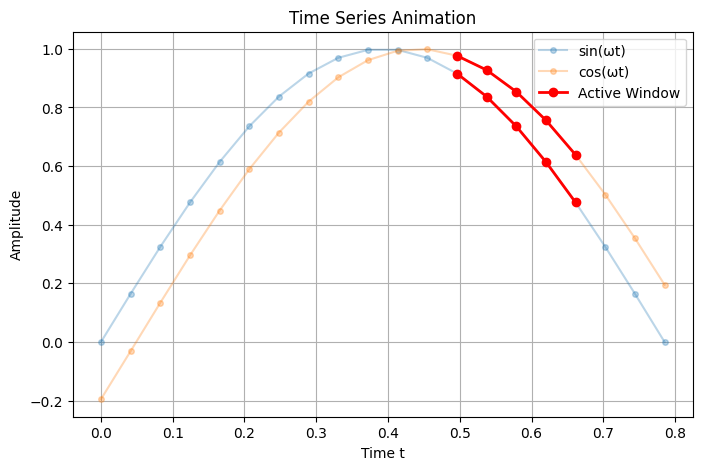

In [16]:


# Define the intervals (starts)
starts = np.arange(0, n - n_window, n_window) # Step of 2 for smoother animation

# --- 2. Setup the Plot ---
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the static background (The full time series)
# We assign them to variables just in case we need to modify them, 
# but here they remain static.
ax.plot(t, x, '-o', label='sin(ωt)', alpha=0.3, markersize=4) 
ax.plot(t, y, '-o', label='cos(ωt)', alpha=0.3, markersize=4)

# Initialize the dynamic elements (The moving "Red" windows)
# We create empty line objects that we will update in the loop
line_x, = ax.plot([], [], '-o', color='red', linewidth=2, label='Active Window')
line_y, = ax.plot([], [], '-o', color='red', linewidth=2)

# Styling
ax.set_xlabel('Time t')
ax.set_ylabel('Amplitude')
ax.set_title('Time Series Animation')
ax.legend(loc='upper right')
ax.grid(True)

# --- 3. Animation Logic ---

def init():
    """Initializes the background of the animation."""
    line_x.set_data([], [])
    line_y.set_data([], [])
    return line_x, line_y

def update(frame):
    """
    Update function called for every frame.
    'frame' is the index passed from the frames argument in FuncAnimation.
    """
    start_idx = starts[frame]
    end_idx = start_idx + n_window + 1 # +1 to ensure line connectivity
    
    # Update the data for the red lines based on the current window
    current_t = t[start_idx:end_idx]
    current_x = x[start_idx:end_idx]
    current_y = y[start_idx:end_idx]
    
    line_x.set_data(current_t, current_x)
    line_y.set_data(current_t, current_y)
    
    return line_x, line_y

# Create the animation object
# frames=len(starts) tells it how many times to run the loop
# interval=50 means 50 milliseconds between frames
anim = FuncAnimation(fig, update, init_func=init, 
                     frames=len(starts), interval=50, blit=True)

# --- 4. Save to MP4 ---
print("Saving animation to 'time_series_window.mp4'...")

# You can adjust fps (frames per second) to change speed
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
anim.save('time_series_window.mp4', writer=writer)

print("Done!")
plt.show() # Optional: show the window

In [17]:
## Overlapping Intervals

In [18]:
# # BACKUP



# # --- 1. Generate Mock Data (Recreating your context) ---
# n = 200
# n_window = 20
# t = np.linspace(0, 4 * np.pi, n)
# x = np.sin(t)
# y = np.cos(t)

# # Define the intervals (starts)
# starts = np.arange(0, n - n_window, 2) # Step of 2 for smoother animation

# # --- 2. Setup the Plot ---
# fig, ax = plt.subplots(figsize=(8, 5))

# # Plot the static background (The full time series)
# # We assign them to variables just in case we need to modify them, 
# # but here they remain static.
# ax.plot(t, x, '-o', label='sin(ωt)', alpha=0.3, markersize=4) 
# ax.plot(t, y, '-o', label='cos(ωt)', alpha=0.3, markersize=4)

# # Initialize the dynamic elements (The moving "Red" windows)
# # We create empty line objects that we will update in the loop
# line_x, = ax.plot([], [], '-o', color='red', linewidth=2, label='Active Window')
# line_y, = ax.plot([], [], '-o', color='red', linewidth=2)

# # Styling
# ax.set_xlabel('Time t')
# ax.set_ylabel('Amplitude')
# ax.set_title('Time Series Animation')
# ax.legend(loc='upper right')
# ax.grid(True)

# # --- 3. Animation Logic ---

# def init():
#     """Initializes the background of the animation."""
#     line_x.set_data([], [])
#     line_y.set_data([], [])
#     return line_x, line_y

# def update(frame):
#     """
#     Update function called for every frame.
#     'frame' is the index passed from the frames argument in FuncAnimation.
#     """
#     start_idx = starts[frame]
#     end_idx = start_idx + n_window + 1 # +1 to ensure line connectivity
    
#     # Update the data for the red lines based on the current window
#     current_t = t[start_idx:end_idx]
#     current_x = x[start_idx:end_idx]
#     current_y = y[start_idx:end_idx]
    
#     line_x.set_data(current_t, current_x)
#     line_y.set_data(current_t, current_y)
    
#     return line_x, line_y

# # Create the animation object
# # frames=len(starts) tells it how many times to run the loop
# # interval=50 means 50 milliseconds between frames
# anim = FuncAnimation(fig, update, init_func=init, 
#                      frames=len(starts), interval=50, blit=True)

# # --- 4. Save to MP4 ---
# print("Saving animation to 'time_series_window.mp4'...")

# # You can adjust fps (frames per second) to change speed
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# anim.save('time_series_window.mp4', writer=writer)

# print("Done!")
# plt.show() # Optional: show the window